In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Проверяем формат столбцов

In [96]:
df.dtypes


Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [97]:
df["Дата"] = pd.to_datetime(df["Дата"])


In [98]:
df.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [99]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

grouped_df

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055
...,...,...
200,2018-08-26,5302
201,2018-08-28,5983
202,2018-08-29,4969
203,2018-08-30,4648


Вывести несколько первых строк сгруппированных данных

In [100]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

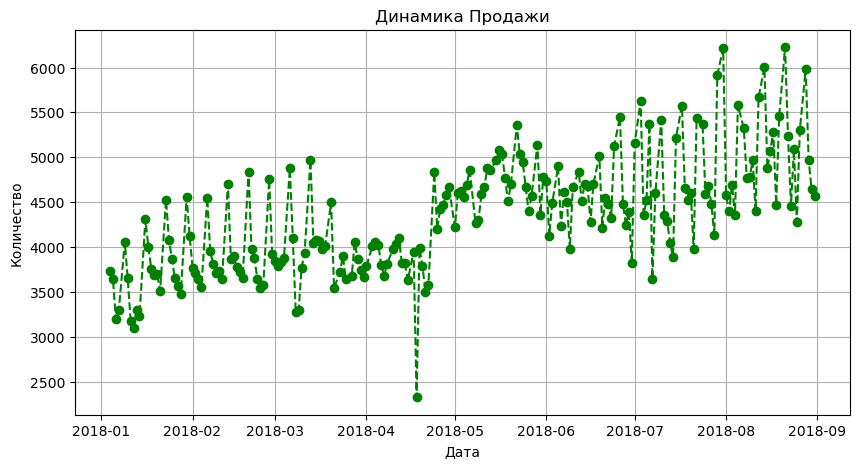

In [101]:
plt.figure(figsize=(10, 5))


plt.plot(grouped_df["Дата"], grouped_df["Количество"],marker='o',color='green',linestyle='--')
plt.title('Динамика Продажи')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.grid(True)


plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

линия  вверх -спрос на товар растёт.
линия вниз -продажи снижаются.
сильные  колебания -спрос нестабилен, возможны сезонные факторы.

Пиковые значения:
что могло привести к росту (акции, праздники, новые поставки).
Минимальные значения:

Дни с низкими продажами видны как впадины на графике(выходные, снижение спроса, отсутствие товара).

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [102]:
q1=df['Количество'].quantile(0.25)
q3=df['Количество'].quantile(0.75)

IQR=q3-q1


lower_bound=q1-1.5*IQR
upper_bound=q3-1.5*IQR


outliers=df[(df['Количество'] < lower_bound)| (df['Количество']>upper_bound)]

max_outlier= outliers.loc[outliers["Количество"].idxmax()]

print("Строка с максимальным выбросом по количеству продаж: {max_outlier}")

Строка с максимальным выбросом по количеству продаж: {max_outlier}


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [103]:
df_filtered = df[(df["Дата"].dt.month.isin([6, 7, 8])) & (df["Дата"].dt.weekday == 2) & (df["Склад"] == 3)]  

top_product = df_filtered.groupby("Номенклатура")["Количество"].sum().idxmax()

print(f"Топовый товар по продажам по средам за лето на складе №3:{top_product}")

Топовый товар по продажам по средам за лето на складе №3:product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [129]:
weather_df = pd.read_excel("weather.xls", engine="xlrd", skiprows=6)
weather_df.head()


,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.08.2018 23:00,8.2,736.6,768.3,0.2,78.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,31.08.2018 20:00,9.6,736.4,767.9,1.2,88.0,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,31.08.2018 17:00,11.3,735.2,766.4,0.4,83.0,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
3,31.08.2018 14:00,12.3,734.8,765.9,0.9,80.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN
4,31.08.2018 11:00,13.2,733.9,764.8,1.0,83.0,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,10.3,3,12.0,NaN,NaN,NaN,NaN


In [130]:
weather_df = weather_df.iloc[:, [0, 1]]  # Берём только нужные колонки
weather_df.columns = ["Дата", "T"]  # Меняем названия колонок

weather_df["Дата"] = pd.to_datetime(weather_df["Дата"], dayfirst=True, errors="coerce")
weather_df["Дата"] = weather_df["Дата"].dt.date


In [131]:
print(weather_df.iloc[:, [0, 1]])

            Дата     T
0     2018-08-31   8.2
1     2018-08-31   9.6
2     2018-08-31  11.3
3     2018-08-31  12.3
4     2018-08-31  13.2
...          ...   ...
1913  2018-01-04  -9.6
1914  2018-01-04 -12.3
1915  2018-01-04 -12.6
1916  2018-01-04 -12.3
1917  2018-01-04 -13.4

[1918 rows x 2 columns]


In [132]:
weather_df=weather_df.groupby("Дата", as_index=False).mean()
print(weather_df)

           Дата        T
0    2018-01-04 -14.0750
1    2018-01-05 -16.8625
2    2018-01-06 -13.3000
3    2018-01-07 -12.7500
4    2018-01-08 -15.4125
..          ...      ...
235  2018-08-27  12.5250
236  2018-08-28  14.1125
237  2018-08-29  13.8250
238  2018-08-30  14.1750
239  2018-08-31  11.0250

[240 rows x 2 columns]


In [138]:
grouped_df["Дата"] = pd.to_datetime(grouped_df["Дата"])
weather_df["Дата"] = pd.to_datetime(weather_df["Дата"])


merged_df = pd.merge(grouped_df, weather_df, on="Дата", how="inner")
merged_df

,Дата,Количество,T
0,2018-01-04,3734,-14.0750
1,2018-01-05,3643,-16.8625
2,2018-01-06,3193,-13.3000
3,2018-01-07,3298,-12.7500
4,2018-01-09,4055,-6.2500
...,...,...,...
200,2018-08-26,5302,11.9750
201,2018-08-28,5983,14.1125
202,2018-08-29,4969,13.8250
203,2018-08-30,4648,14.1750


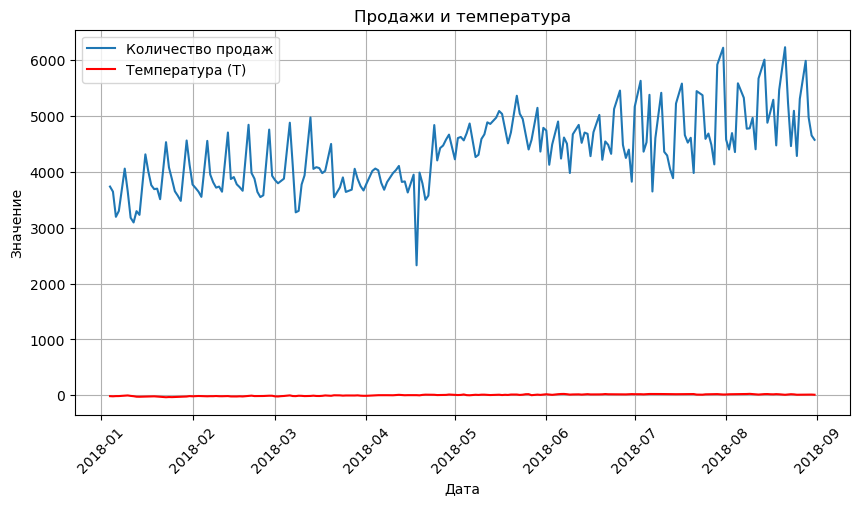

In [136]:
plt.figure(figsize=(10,5))

plt.plot(merged_df['Дата'], merged_df['Количество'], label="Количество продаж")
plt.plot(merged_df['Дата'], merged_df['T'], label="Температура (T)", color='red')

plt.legend()
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Продажи и температура")
plt.xticks(rotation=45)
plt.grid()

plt.show()


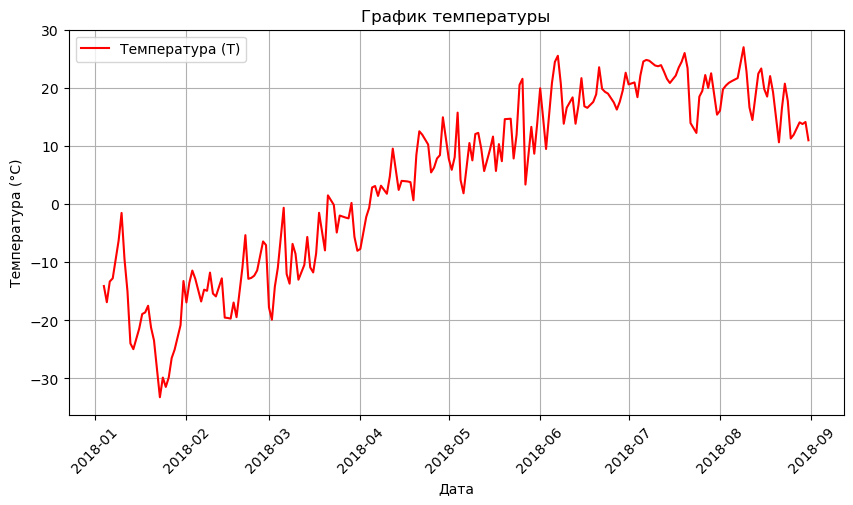

In [139]:
plt.figure(figsize=(10,5))

plt.plot(merged_df['Дата'], merged_df['T'], label="Температура (T)", color='red')
plt.legend()
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.title("График температуры")
plt.xticks(rotation=45)
plt.grid()

plt.show()